In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

In [ ]:
# Load and read training and testing data
def read_data(file):    
    data = file.read()
    lines = [x.strip() for x in data.split("\n")]
    cepstral_coef_num = 13
    lines.pop()
    utterances = [None]*lines.count('')
    count = 0
    max_utterance = 0
    current_utterance = 0

    for line in lines:
        if line == "":
            if current_utterance > max_utterance:
                max_utterance = current_utterance
            current_utterance = 0
        else:
            current_utterance += 1

    out = np.zeros((lines.count(''), max_utterance, cepstral_coef_num))
    out_windows = np.zeros((len(lines), cepstral_coef_num));
    del lines[0]
    utterance_index = 0
    window_index = 0
    overall_window = 0
    cep_index = 0
    for line in lines:
        if line == "":
            window_index = 0
            utterance_index += 1
            continue
        else: 
            nums = line.split(" ")
            for n in nums:
                out[utterance_index, window_index, cep_index] = float(n)
                out_windows[overall_window, cep_index] = float(n)
                cep_index += 1
            window_index += 1
            overall_window += 1
            cep_index = 0
    out[out == 0] = np.nan
#     out_windows[out_windows == 0] = np.nan
    return out, out_windows

train_file = open("C:\\Users\\ianha\\Downloads\\Train_Arabic_Digit.txt")
test_file = open("C:\\Users\\ianha\\Downloads\\Test_Arabic_Digit.txt")

train, train_windows = read_data(train_file)
test, test_windows = read_data(test_file)

In [ ]:
# Split into numbers
number_starts = []
numbers = []
index = 0
number = 0
while index < len(train):
    number_starts.append(index)
    index += 660
    numbers.append(number)
    number += 1

(269856, 13)


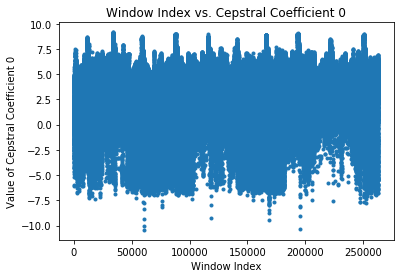

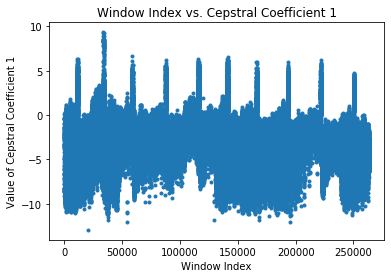

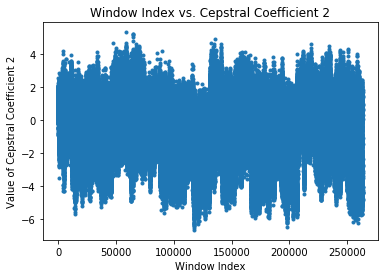

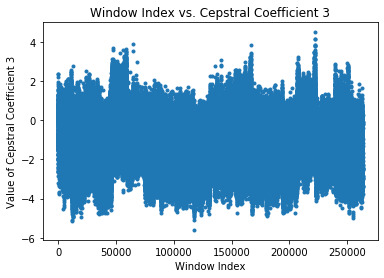

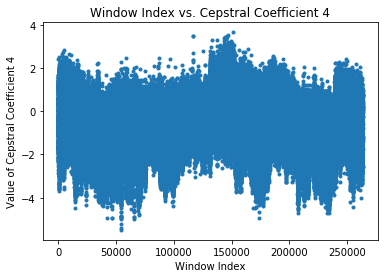

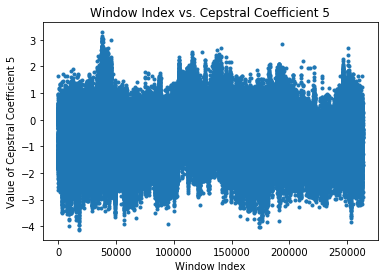

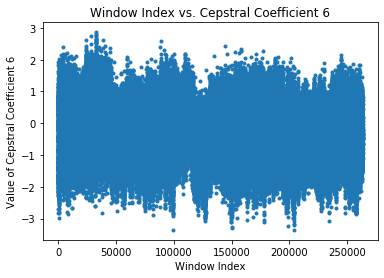

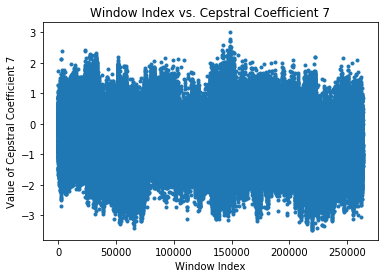

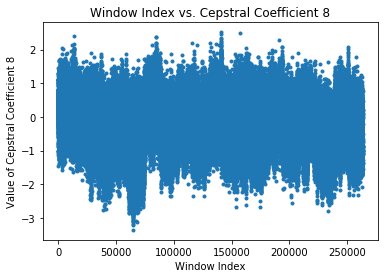

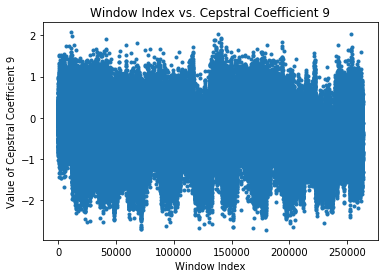

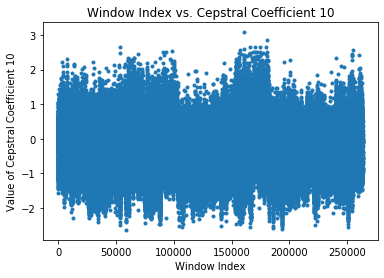

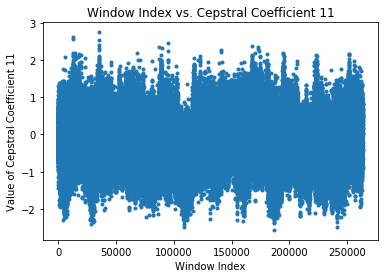

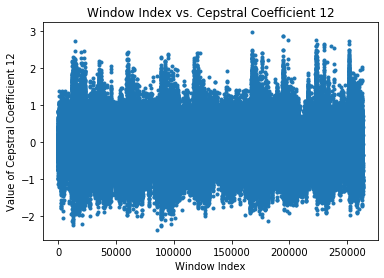

In [ ]:
# Cepstral coefficient value as a function of window index
# number = 0
# total_data = train[:, 0,0]
# for x in range(10):
#     cepstral_coef = 0
#     window_index = train[number_starts[x], :, cepstral_coef]
#     plt.figure()
#     plt.plot(window_index)
#     plt.xlabel("Window Index")
#     plt.ylabel("Cepstral Coefficient " + str(cepstral_coef))
#     plt.title("Window Index vs. First Cepstral Coefficient for " + str(number))
#     number += 1
for x in range(13):
    plt.figure()
    plt.plot(train_windows[:, x], '.')
    plt.xlabel("Window Index")
    plt.ylabel("Value of Cepstral Coefficient " + str(x))
    plt.title("Window Index vs. Cepstral Coefficient " + str(x))

In [ ]:
# GMM estimation via k-means
gmm = mixture.GaussianMixture(n_components=10).fit(train_windows)
print(gmm.weights_.shape)

(10,)


In [ ]:
print(gmm.covariances_)
# https://stephens999.github.io/fiveMinuteStats/intro_to_em.html#mle_of_gaussian_mixture_model

[[[ 1.86113594e+00 -6.86764741e-01 -1.04340526e+00 ... -1.05399395e-01
    7.49720988e-02 -1.99594593e-01]
  [-6.86764741e-01  1.41210306e+00  5.03515060e-01 ... -1.34631772e-01
   -1.46793222e-01 -1.92595775e-02]
  [-1.04340526e+00  5.03515060e-01  1.11647411e+00 ...  1.31977103e-03
   -1.06046179e-01  6.02709127e-02]
  ...
  [-1.05399395e-01 -1.34631772e-01  1.31977103e-03 ...  2.43473413e-01
    7.15053208e-02  9.33771942e-02]
  [ 7.49720988e-02 -1.46793222e-01 -1.06046179e-01 ...  7.15053208e-02
    2.45314050e-01  1.19854756e-01]
  [-1.99594593e-01 -1.92595775e-02  6.02709127e-02 ...  9.33771942e-02
    1.19854756e-01  4.19109817e-01]]

 [[ 4.65775667e+00  1.01822005e-01  2.57147379e-01 ... -6.89364957e-01
   -3.28356081e-01 -5.52842583e-01]
  [ 1.01822005e-01  3.89267702e-01  3.63069471e-01 ... -6.38298268e-02
    2.00512680e-02 -6.85321267e-02]
  [ 2.57147379e-01  3.63069471e-01  4.41359220e-01 ... -8.37827172e-02
    5.47472170e-02 -1.33806816e-01]
  ...
  [-6.89364957e-01 -6.3